# Minimizando una función lineal
Hoy te mostraré cómo usar binary_search para minimizar una función lineal.

## Una función lineal
Es una función polinómica de primer grado, es decir, una función cuya representación en el plano cartesiano es una línea recta. ([Wikipedia](https://es.wikipedia.org/wiki/Funci%C3%B3n_lineal))

Este es un ejemplo, tenemos una función que devuelve el doble del elemento ingresado.

In [4]:
def f(x):
    return 2*x

In [10]:
x=[]
y=[]
for i in range(10):
    x.append(i)
    y.append(f(i))

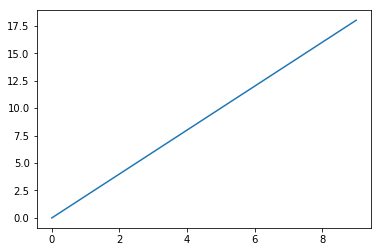

In [12]:
from matplotlib import pyplot as plt
import pandas as pd
plt.plot(x,y)

## Resolver un problema con binary_search

El problema planteado en el libro es el siguiente:  
Tines $N$ máquinas que tardan $p_{i}$ horas en realizar un trabajo. Si tienes $M$ trabajos por realizar, cuál es el tiempo mínimo en el que se terminarían todos los trabajos.

El secreo para resolver este problema es entender la función lineal que gobierna cuántas tareas puede cumplir cada máquina. Si tienes $3$ máquinas y cada máquina tarda $2$ horas en realizar un trabajo, entonces puedes realizar $3\times{\frac{1}{2} }$ trabajos en una hora. Entonces, dada una cantidad de horas, cuántos trabajos puedes lograr. Si hacemos la matemática para dos horas sería: $3\times{\frac{1}{2}}\times{2}=3$, entonces podemos realizar 3 trabajos en dos horas. 

Ahora, podemos genelizar esta regla como:  
$f(x)=N\times{\frac{1}{p_{i}}}\times{x}$

Donde:
* $N$ es el número de máquinas disponibles
* $p_{i}$ es el número de trabajos que la máquina realiza en una hora y
* $x$ es el número de horas que les das a las máquinas para trabajar. 


In [35]:
def trabajos_logrados(N,p_i,x):
    return N*1/p_i*x # medio trabajo no cuenta, por eso sólo tomo los trabajos completos
    

Si hacemos un plot de la función, veremos que es una función lineal.

0.0
1.5
3.0
4.5
6.0
7.5
9.0
10.5
12.0
13.5


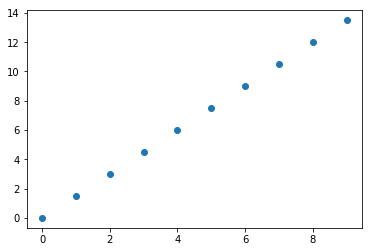

In [36]:
N = 3 #tengo tres máquinas
p_i = 2 # cada máquina tarda dos horas en realizar un trabajo
y = []
x = []
for i in range(10):
    y.append(trabajos_logrados(N,p_i,i))
    print(y[-1])
    x.append(i)

plt.plot(x,y,r'o')


Esa fue una explicación simplificada, ahora voy a construir la función para resolver el problema. Cada máquina tiene un tiempo de procesamiento diferente.

In [38]:
def trabajos_logrados(p,x):
    trabajos = 0
    for p_i in p:
        trabajos += 1/p_i*x
    return trabajos

Si comprobamos el planteamiento anterior la respuesta es la misma.

0.0
1.5
3.0
4.5
6.0
7.5
9.0
10.5
12.0
13.5


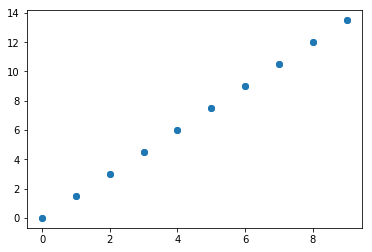

In [39]:
N = 3 #tengo tres máquinas
p = [2,2,2] # cada máquina tarda dos horas en realizar un trabajo
for i in range(10):
    y.append(trabajos_logrados(p,i))
    print(y[-1])
    x.append(i)

plt.plot(x,y,r'o')

Este nuevo planteamiento se puede presentar como:  


$\sum_{i=1}^{N}{\frac{1}{p_{i}}\times{x}}$

### Binary search cómo funciona
Queremos saber cuál es el tiempo mínimo en el que todas las máquinas terminan los $M$ trabajos asignados. Lo que podemos hacer es probar con distintos valores de x hasta que encontremos el mínimo donde todo el trabajo está hecho. Ya que estamos trabajando con enteros, eso significa que la hora mínima es aquella que va después de una hora no posible.

Usemos el ejemplo que vamos manejando, 3 máquinas que tardan dos horas, tenemos que realizar 5 trabajos, ¿cuál es el tiempo mínimo? **La respuesta es 4 horas**. En 4 horas las máquinas pueden realizar 6 trabajos, mientras que en 3 horas sólo pueden realizar 3. 

In [52]:
#modifico mi función para que sólo tome en cuenta los trabajos completos
def trabajos_logrados(p,x):
    trabajos = 0
    for p_i in p:
        trabajos += int(1/p_i*x) #sólo los trabajos completos
    return trabajos

In [53]:
#trabajos logrados en 3 horas
p=[2,2,2]
trabajos_logrados(p,3)

3

In [45]:
#trabajos logrados en 4 horas
p=[2,2,2]
trabajos_logrados(p,4)

6

Entonces, la hora mínima es la x que va después de una hora no válida. Ahora estamos listos para resolver el problema. Tengo que elegir un rango para la búsqueda binaria, entre un número que sé que es falso (los trabajos no se cumplen), como 0, y un número que sé que es verdadero (una hora donde todos los trabajos se cumplen); para obtener ese número multiplicaré un $p_i$ por $M$ y así obtengo el tiempo que tarda una máquina en hacer todos los trabajos, lo cual es mi definción de verdadero, todos los trabajos se cumplen.

In [75]:
def hora_mínima(N,p,M):
    a = 0 #sé que es falso
    b = p[0] * M #sé que todos los trabajos se cumplen
    l = range(a,b+1)
    minimo = False #esto me dirá si encontré el mínimo
    while(a<=b):
        centro = (a+b)//2
        x = l[centro] #hora elegida 
        #los trabajos logrados a la hora x son igual o mayores a los trabajos pedidos
        if(trabajos_logrados(p,x)>=M):
            if(es_minimo(p,x,M)):
                return x
            #si no es mínimo, el mínmo está más abajo
            else:
                b = centro-1
        #si los trabajos logrados no son suficientes, el mínimo está más arriba
        else:
            a = centro+1
                
    
    
    

In [76]:
def es_minimo(p,x,M):
    if(trabajos_logrados(p,x-1)<M):
        return True #la hora anterior no cumple, entonces es mínimo
    else:
        return False #la hora anterior sí cumple, entonces existe una hora mas pequeña
        

In [77]:
N = 3 #tengo tres máquinas
p = [2,2,2] # cada máquina tarda dos horas en realizar un trabajo
M = 5 # trabajos a realizar
hora_mínima(N,p,M)

4

La respuesta fue 4 horas. Ahora, probaré el ejercicio del libro.

In [78]:
N = 3 #tengo tres máquinas
p = [2,3,7] # cada máquina tarda dos horas en realizar un trabajo
M = 8 # trabajos a realizar
hora_mínima(N,p,M)

9

La respuesta fue 9 horas, tal y como lo indica el el libro, hemos usado búsqueda binaria para minimizar una función lineal.

Voy a modificar la funcón para saber cuántos centros comparó.

In [73]:
def hora_mínima(N,p,M):
    a = 0 #sé que es falso
    b = p[-1] * M #sé que todos los trabajos se cumplen
    l = range(a,b+1)
    print("Lista:",l)
    minimo = False #esto me dirá si encontré el mínimo
    while(a<=b):
        centro = (a+b)//2
        print("Centro:",centro)
        x = l[centro] #hora elegida 
        #los trabajos logrados a la hora x son igual o mayores a los trabajos pedidos
        if(trabajos_logrados(p,x)>=M):
            if(es_minimo(p,x,M)):
                return x
            #si no es mínimo, el mínmo está más abajo
            else:
                b = centro-1
        #si los trabajos logrados no son suficientes, el mínimo está más arriba
        else:
            a = centro+1

In [74]:
N = 3 #tengo tres máquinas
p = [2,3,7] # cada máquina tarda dos horas en realizar un trabajo
M = 8 # trabajos a realizar
hora_mínima(N,p,M)

Lista: range(0, 57)
Centro: 28
Centro: 13
Centro: 6
Centro: 9


9

Vemos que comparó 4 centros antes de llegar a la respuesta. Si quisiéramos usar fuerza bruta y probar todas las horas posibles, tendríamos que recorrer una lista de 57 elementos.